In [3]:
'''Рассчитайте среднеквадратическое отклонение данных выборочных значений:

1 5 2 7 1 9 3 8 5 9

Не забудьте, что при расчете дисперсии и среднеквадратичного отклонения мы вычитаем единицу из общего числа наблюдений!'''

arr = [int(i) for i in '1 5 2 7 1 9 3 8 5 9'.split()]

def avg_arr(arr):
    return sum(arr) / len(arr)  # среднее

def D(arr):
    D = sum([(i - avg_arr(arr)) ** 2 for i in arr]) / (len(arr) - 1)  # Дисперсия, на вход функции подаем список с числами
    return D

def sd(arr):
    return D(arr) ** 0.5   # среднее квадратичное отклонение, вычисляем взятием корня из вызовы функции дисперсии
    

print(sd(arr))


3.1622776601683795


In [4]:
'''!!! ВНИМАНИЕ, кол-во элементов выборки должно быть больше 30'''

# se - стандартная ошибка среднего

# Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100

se = 2 / 100 ** 0.5



def se(arr):
    return sd(arr)/(len(arr) ** 0.5)

print(se(arr))
    
    

1.0


In [5]:
'''Доверительный интервал'''

# 95% что среднее генерально совокупности лежить в интервале выборочное среднее +- 1.96se
# 99% что среднее генерально совокупности лежить в интервале выборочное среднее +- 2.58se

'''Рассчитайте 99% доверительный интервал для следующего примера:

x¯=10
sd=5
n=100'''

def dover(arr, x):        # доверительный интервал, с разной степенью вероятности
    if x == '95%':
        return (avg_arr(arr) - 1.96 * se(arr), avg_arr(arr) + 1.96 * se(arr))
    elif x == '99%':
        return (avg_arr(arr) - 2.58 * se(arr), avg_arr(arr) + 2.58 * se(arr))
    
print(dover(arr, '99%'))  


# В случае t - распределения коэффициенты меняются согласно процентам и кол-ву степеней свободы n - 1
# https://www.medcalc.org/manual/t-distribution.php

# Например X¯=89,9 sd=11,3 n=20 Для 95% коэфф равен, 2,093, интервал [84,61 ; 95,19]
    

(2.42, 7.58)


In [6]:
'''t - критерий Стьюдента, крайне желательны гомогенности дисперсий (критерии Ленна, Фишера), при n < 30, нужна рповерка на нормальность распределения'''

a = '5 6 5 7 5 7 6 7 5 5 6'
b = '7 7 6 7 7 13 6 10 8 6 4'
arr1 = [int(i) for i in a.split()]
arr2 = [int(i) for i in b.split()]


def t_stud(arr1, arr2):  # t -критерий стбюдента вместе с кол-вом степеней свободы df дает возможность выявить вероятность
    return (avg_arr(arr1) - avg_arr(arr2)) / (sd(arr1) ** 2 / len(arr1) + (sd(arr2) ** 2 / len(arr2))) ** 0.5
                                              
t_stud(arr1, arr2)                                              
    
                                              
    



-2.0232361254345603

## Однофакторный дисперсионный анализ

In [7]:
# пример для трех групп

arr1 = [2, 4, 5, 10, 4]
arr2 = [3, 7, 5, 2, 4]
arr3 = [6, 7, 6, 4, 1]

def len_all(*args):  # общее кол-во элементов в группах
    l = 0
    for i in args:
        l += len(i)
    return l 

def avg_arr_all(*args):        # для вычиления среднего по всем группам
    arr = []
    for i in args:
        arr += i
    return avg_arr(arr)    
      

def SST(*args):            # общая сумма квадратов разностей от общей средней
    arr = []               # df для SST = кол-во всех элементов - 1
    for i in args:
        arr += i
    SST = sum([(i - avg_arr(arr)) ** 2 for i in arr])
    return SST
        
def SSW(*args):            # общая сумма квадратов разностей внутри каждой группы
    SSW = 0                # df для SSW = кол-во всех элементов - кол-во групп
    for i in args:
        SSW += sum([(j - avg_arr(i)) ** 2 for j in i])
    return SSW        

def SSB(*args):            # для вычисления межгрупповой
    SSB = 0                # df для SSB = число групп - 1
    for i in args:
        SSB += len(i) * (avg_arr(i) - avg_arr_all(*args)) ** 2
    return SSB

def F(*args):
    F = SSB(*args) / (len(args) - 1) 
    X = SSW(*args) / (len_all(*args) - len(args))
    return F / X

print(F(arr1, arr2, arr3))

0.1413043478260869


In [8]:
arr1 = [3, 1, 2]
arr2 = [5, 3, 4]
arr3 = [7, 6, 5]

print(avg_arr_all(arr1, arr2, arr3))
print(SST(arr1, arr2, arr3))
print(SSW(arr1, arr2, arr3))
print(SSB(arr1, arr2, arr3))
print(F(arr1, arr2, arr3))


4.0
30.0
6.0
24.0
12.0


In [9]:
'''Задачка на генной терапии'''

with open('C:/Users/hobx2/Downloads/genetherapy.csv', 'r', encoding = 'utf8') as fin:
    fout = fin.read()
arrA = []
arrB = []
arrC = []
arrD = []

    
for i in fout.splitlines():
    a = i.split(',')
    if a[1] == '"A"':
        arrA.append(int(a[0]))
    elif a[1] == '"B"':
        arrB.append(int(a[0]))
    elif a[1] == '"C"':
        arrC.append(int(a[0]))
    elif a[1] == '"D"':
        arrD.append(int(a[0]))
        
print(F(arrA, arrB, arrC, arrD))   
print(SSB(arrA, arrB, arrC, arrD))        
print(SSW(arrA, arrB, arrC, arrD))        
        


8.037302481143987
560.7166666666667
1302.2666666666669


## Критерий Тьюки

In [10]:
def Tukey(*args):  # для нормализации вероятности нахождения статистической значимости между двумя группами
    q = (avg_arr(args[0]) - avg_arr(args[1])) / ((SSW(*args) / 2) * (1 / len(arr1) + 1 / len(arr2))) ** 0.5
    return q

Tukey(arrA, arrB, arrC, arrD)

0.04479684641301506

In [11]:
'''Задача по атеросклерозу'''
from pprint import pprint
arr = []

with open('atherosclerosis.csv', 'r', encoding = 'utf8') as fin:
    for i in fin.read().splitlines()[1:]:
        arr2 = i.split(',')
        arr.append([arr2[0], arr2[1], arr2[2]])
        
arr1 = []
arr2 = []
arr3 = []
arr4 = []
        
for i in arr:
    if i[1] == '"1"':
        arr1.append(float(i[0]))
    else:
        arr2.append(float(i[0]))
    if i[2] == '"D1"':
        arr3.append(float(i[0]))
    else:
        arr4.append(float(i[0]))

      
print(SSB(arr1, arr2), SSB(arr3, arr4))
print(F(arr1, arr2), F(arr3, arr4))  

        
        

197.45275411174953 16.91224059334897
7.612770077047062 0.5862334097241754


               sum_sq  df          F      PR(>F)
age        197.452754   1    7.44984  0.00831345
dose        16.912241   1   0.638094    0.427552
age:dose     0.927077   1  0.0349784    0.852272
Residual  1590.257424  60        NaN         NaN


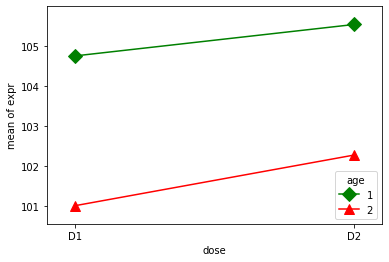

In [12]:
'''Задача по атеросклерозу'''
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

data=pd.read_csv('atherosclerosis.csv', sep=',')
#Картинка
fig=interaction_plot(data.dose,data.age,data.expr,colors=['green','red'], markers=['D','^'], ms=10)
#Степени свободы
N =  len(data.expr)
m1 = len(data.age.unique())
m2 = len(data.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2
#Общее среднее
grand_mean = data['expr'].mean()
#Суммы квадратов
ssq_a = sum([(data[data.age ==i].expr.mean()-grand_mean)**2 for i in data.age])
ssq_b = sum([(data[data.dose ==i].expr.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.expr - grand_mean)**2)
spl_age=[data[data.age == i] for i in data.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(data.age.unique()))])
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w
#P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)
#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
print(aov_table1)

In [13]:
'''Кальций в плазме птиц'''
from pprint import pprint
arr = []

with open('birds.csv', 'r', encoding = 'utf8') as fin:
    for i in fin.read().splitlines()[1:]:
        arr2 = i.split(',')
        arr.append([arr2[0], arr2[1], arr2[2]])
        
arr1 = []
arr2 = []
arr3 = []
arr4 = []
        
for i in arr:
    if i[1] == '"1"':
        arr1.append(float(i[0]))
    else:
        arr2.append(float(i[0]))
    if i[2] == '"1"':
        arr3.append(float(i[0]))
    else:
        arr4.append(float(i[0]))
        
arrA = []
arrB = []
arrC = []
arrD = []

for i in arr:
    if i[1] == '"0"':
        if i[2] == '"1"':
            arrA.append(float(i[0]))

    else:
        if i[2] == '"0"':
            arrB.append(float(i[0]))

            
            
   
print(SSB(arr1, arr2), SSB(arr3, arr4))
print(F(arr1, arr2), F(arr3, arr4))
print(SSB(arrA, arrB))
print(F(arrA, arrB))
 


0.847471621667448 0.11976249361818868
0.07758282144554525 0.010952035330063685
0.8022003508041529
0.11293638734337536


In [14]:
'''кальций у птиц'''

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(URL)

formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


## Коэффициент корреляции

In [15]:
arr = [(50, 150), (60, 150), (70, 180), (90, 170), (60, 180), (100, 200), (50, 170), (60, 170)]
arr2 = [(1, 2), (2, 4), (3, 5), (3, 6), (4, 8), (4, 9)]
arr3 = [(4, 2), (5,1), (2, 4), (3, 3), (1, 5)]

def rxy(arr: list) -> float:
    avgx = avg_arr([i[0] for i in arr])
    avgy = avg_arr([i[1] for i in arr])
    chisl = sum([(i[0] - avgx) * (i[1] - avgy) for i in arr])
    znam = (sum([(i[0] - avgx) ** 2 for i in arr]) * sum([(i[1] - avgy) ** 2 for i in arr])) ** 0.5
    return chisl / znam

rxy(arr3)
    
    
   


-1.0

In [16]:
def encrypt(text, n):
    if n <= 0:
        return text
    else:
        for i in range(n):
            text = ''.join([b  for a, b in enumerate(text) if (a + 1) % 2 == 0]) + ''.join([b  for a, b in enumerate(text) if (a + 1) % 2 != 0])
    return text

print(encrypt("This is a test!", 3))


def decrypt(encrypted_text, n):
    arr = []
    a, b = (encrypted_text[int(len(encrypted_text) / 2):], encrypted_text[:int(len(encrypted_text) / 2 )])
    for i in range(n):
        if len(encrypted_text) % 2 == 0:
            [arr.append(a[j] + b[j]) for j in range(int(len(encrypted_text) / 2))]
            s = ''.join(arr)
            arr = []
            a, b = (s[int(len(encrypted_text) / 2):], s[:int(len(encrypted_text) / 2 )])       
        else:
            [arr.append(a[j] + b[j]) for j in range(int(len(encrypted_text) / 2))]
            arr.append(a[-1])
            s = ''.join(arr)
            arr = []
            a, b = (s[int(len(encrypted_text) / 2):], s[:int(len(encrypted_text) / 2 )])
    return s    
        
        
decrypt(" Tah itse sits!", 3)        
        

 Tah itse sits!


'This is a test!'

## Простая линия регрессии

In [17]:
'''выводим коэффициенты b0 и b1 для построения прямой методом МНК'''

arrX = [3, 7, 5, 2, 4]
arrY = [6, 7, 6, 4, 1]

def b1(arrx, arry):
    return sd(arry) / sd(arrx) * rxy(list(zip(arrx, arry)))

def b0(arrx, arry):
    return avg_arr(arry) - b1(arrx, arry) * avg_arr(arrx)

print(b1(arrX, arrY))
print(b0(arrX, arrY))





0.5540540540540541
2.472972972972973


In [18]:
'''Задача с данными по штатам США'''

from urllib.request import urlretrieve
import pandas as pd


res = urlretrieve('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv', 'states.csv')

data = pd.read_csv('states.csv')

data.shape  # сколько строк и столбцов

data.head() # заголовок и первые 5 строк, можно указать кол-во строк

data.columns # названия столбцов


Index(['state', 'metro_res', 'white', 'hs_grad', 'poverty', 'female_house'], dtype='object')

In [19]:
data[['state', 'state']] # срез по столбцам

,state,state
0,Alabama,Alabama
1,Alaska,Alaska
2,Arizona,Arizona
3,Arkansas,Arkansas
4,California,California
5,Colorado,Colorado
6,Connecticut,Connecticut
7,Delaware,Delaware
8,District of Columbia,District of Columbia
9,Florida,Florida


In [20]:
data.groupby(['state'])['poverty'].mean() # группировка по штатам и вывоз срднего значения по бедности

state
Alabama                  14.6
Alaska                    8.3
Arizona                  13.3
Arkansas                 18.0
California               12.8
Colorado                  9.4
Connecticut               7.8
Delaware                  8.1
District  of Columbia    16.8
Florida                  12.1
Georgia                  12.1
Hawaii                   10.6
Idaho                    11.8
Illinois                 11.2
Indiana                   8.7
Iowa                      8.3
Kansas                    9.4
Kentucky                 13.1
Louisiana                17.0
Maine                    11.3
Maryland                  7.3
Massachusetts             9.6
Michigan                 10.3
Minnesota                 6.5
Mississippi              17.6
Missouri                  9.6
Montana                  13.7
Nebraska                  9.5
Nevada                    8.3
New  Hampshire            5.6
New Jersey                7.8
New Mexico               17.8
New York                 14.0
Nort

In [21]:
data['poverty'].mean()  # среднее по столбцу

11.349019607843138

In [22]:
data[(data['metro_res'] > 80)] # фильтрация

,state,metro_res,white,hs_grad,poverty,female_house
2,Arizona,88.2,87.7,83.8,13.3,11.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0
11,Hawaii,91.5,25.9,88.5,10.6,12.4
13,Illinois,87.8,79.5,85.9,11.2,12.3
20,Maryland,86.1,65.6,87.6,7.3,14.1


In [23]:
def foo(white):
    return white/100

def foo_back(white):
    return white * 100

data['white'] = data['white'].apply(lambda x: foo(x))   # поменять значение в 'white'

In [24]:
data['white'] = data['white'].apply(lambda x: foo_back(x)) # поменять значение в 'white' обратно

In [25]:
data

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


In [26]:
data.corr() # таблица корреляций

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


In [27]:
data.describe() # основные величины

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C6FAF48C8>,
      dtype=object)

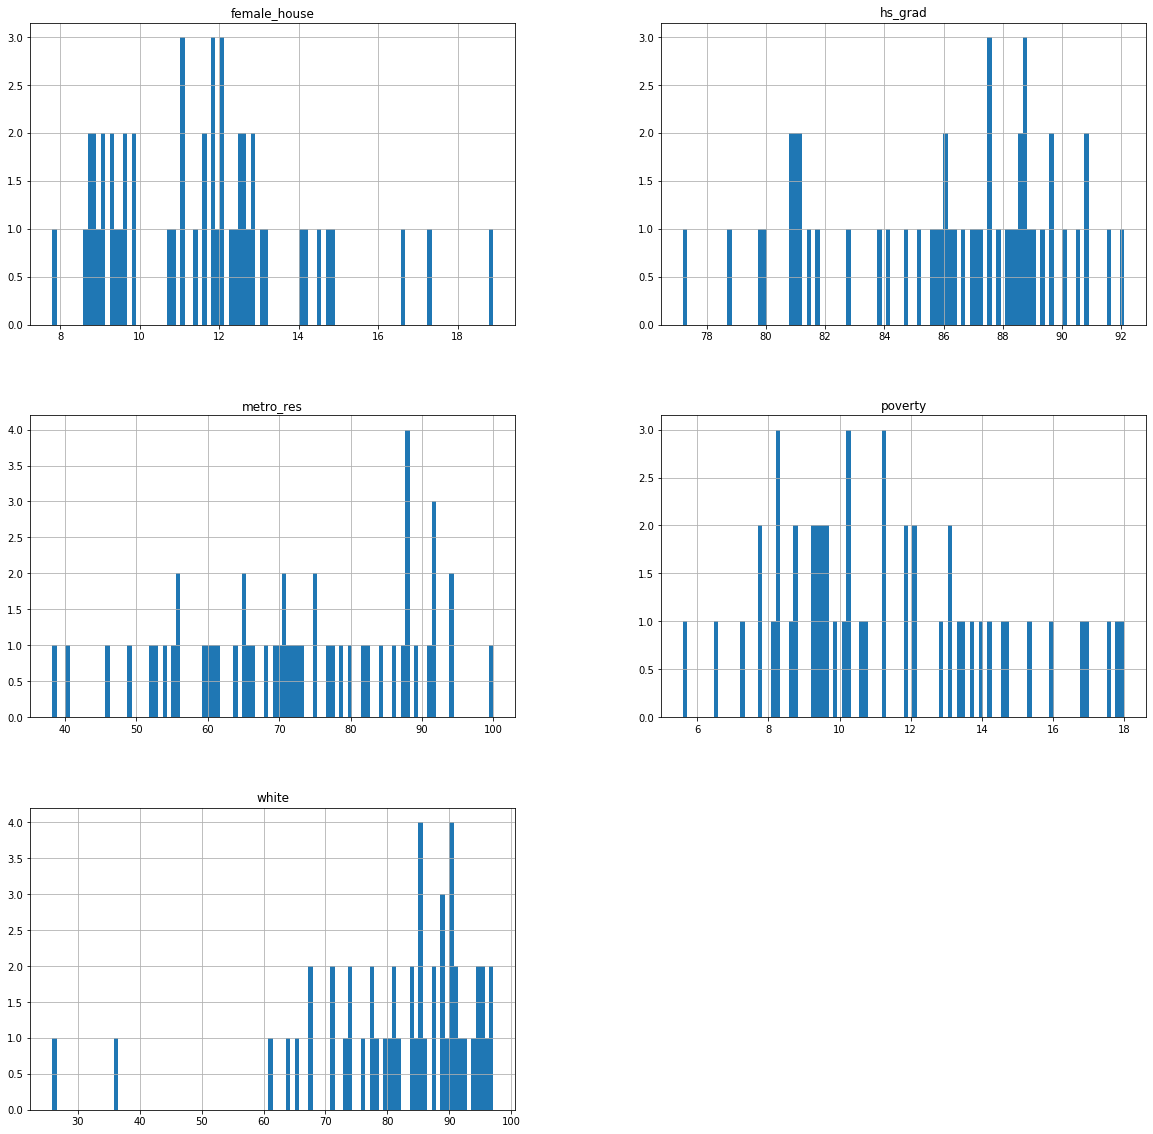

In [28]:
data.hist(figsize=(20, 20), grid=True, bins=100) # гистограмма плотности распределения признаков

## Множественная регрессия

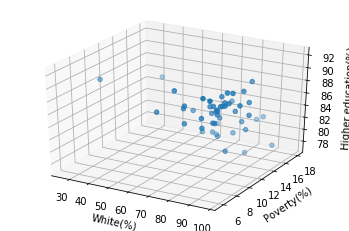

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

data_crop = data[['white', 'hs_grad', 'poverty']]
data_crop.head()
white, hs_grad, poverty = [column for column in data_crop.values.T]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=white, ys=poverty, zs=hs_grad)

ax.set_xlabel('White(%)')
ax.set_ylabel('Poverty(%)')
ax.set_zlabel('Higher education(%)')

plt.show()

In [63]:
'''Задача с данными по штатам США
составим уравнение множественной регресии
'''

from urllib.request import urlretrieve
import pandas as pd


res = urlretrieve('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv', 'states.csv')

data = pd.read_csv('states.csv')

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

model = linear_model.LinearRegression()

X = data[['metro_res', 'white', 'hs_grad', 'female_house']].values
y = data['poverty'].values

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=1)

model.fit(train_data, train_labels)
print(model.coef_)
predictions = model.predict(test_data)

error = metrics.mean_squared_error(predictions, test_labels)
print(error)

model.fit(X, y)  # здесь обучение на всей выборке, без разделения на тестовую и обучающую
print(model.coef_)

[-0.04812472 -0.04158961 -0.58477371  0.13448911]
4.55868882490857
[-0.05632285 -0.04814449 -0.55471329  0.05054296]


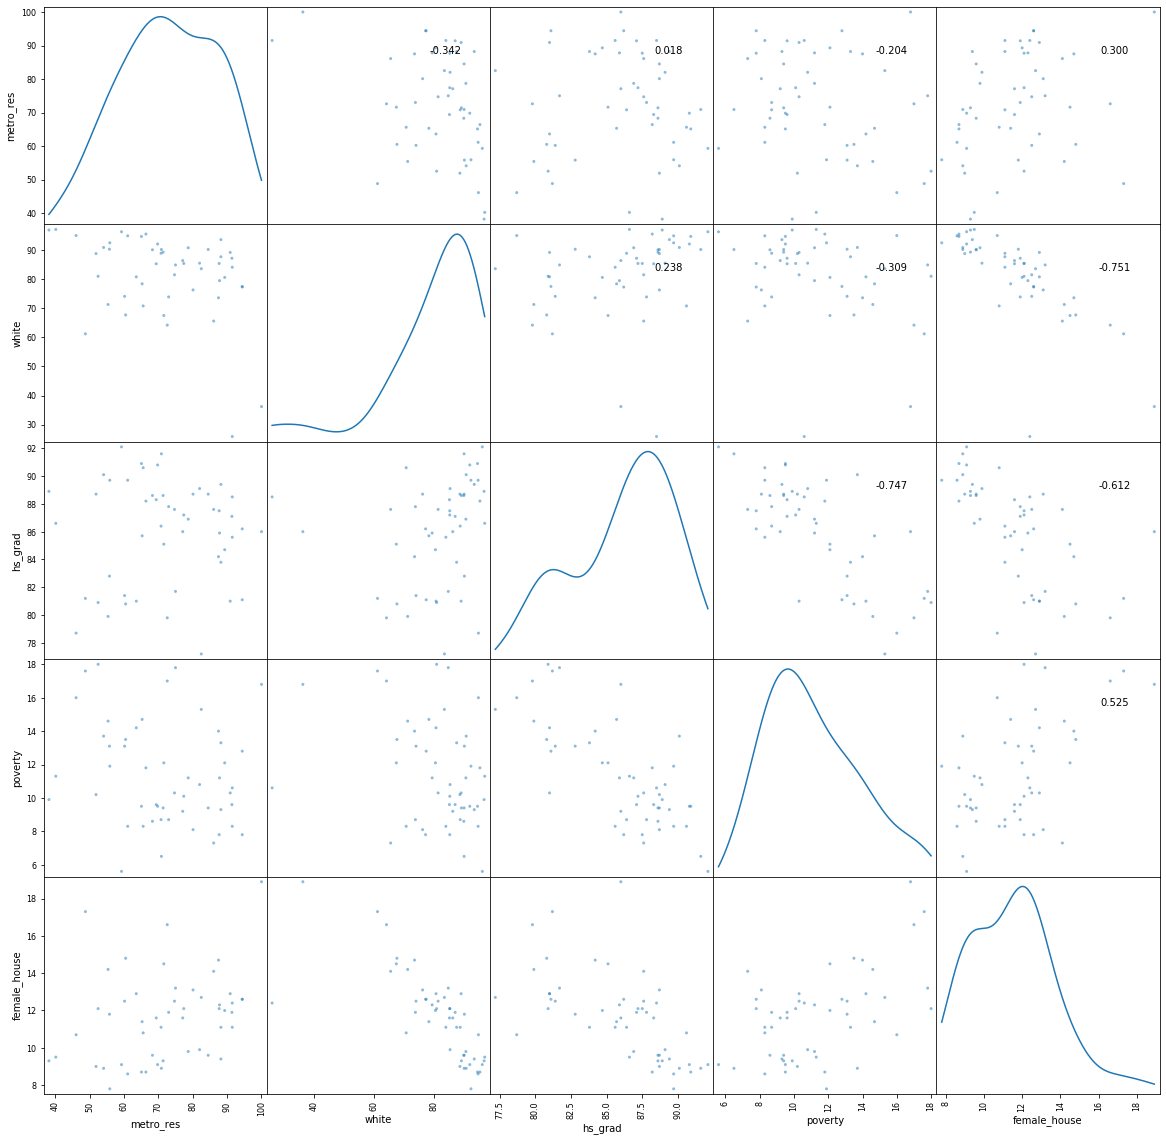

In [67]:
'''Scatter plot, таблица зависимости всех параметров
выбираем параметры которые надо исключить
видим высокий показатель коррелции у female_house с остальными переменными'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(
    'http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')

axes = pd.plotting.scatter_matrix(data, figsize=(20,20), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()